In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np

# Pandas Config
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [38]:
def reverse_ohe(df, features, ignoredFeatures, featuresLength, prefix, suffix = ''):
    all_features = ignoredFeatures + features
    df_pivot = pd.DataFrame(columns = all_features)

    for i in range(featuresLength):
        cols_aux = [f'{feature}{prefix}{i}{suffix}' for feature in features]
        df_aux = df[ignoredFeatures + cols_aux].copy(deep=True)
        df_aux.columns = all_features
        df_pivot = pd.concat([df_pivot, df_aux])

    return df_pivot.sort_values(by='Data_Hora').copy(deep=True)

In [39]:
merged = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/merged.csv',
                sep=';',
                dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

merged.head()

,index,Data,Hora,Data_Hora,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,VelocidadeDoVento_0,Precipitacao_0,Local_0,UmidadeRelativa_1,PressaoAtmosferica_1,TemperaturaDoAr_1,TemperaturaInterna_1,PontoDeOrvalho_1,SensacaoTermica_1,RadiacaoSolar_1,DirecaoDoVento_1,VelocidadeDoVento_1,Precipitacao_1,Local_1,UmidadeRelativa_2,PressaoAtmosferica_2,TemperaturaDoAr_2,TemperaturaInterna_2,PontoDeOrvalho_2,SensacaoTermica_2,RadiacaoSolar_2,DirecaoDoVento_2,VelocidadeDoVento_2,Precipitacao_2,Local_2,UmidadeRelativa_3,PressaoAtmosferica_3,TemperaturaDoAr_3,TemperaturaInterna_3,PontoDeOrvalho_3,SensacaoTermica_3,RadiacaoSolar_3,DirecaoDoVento_3,VelocidadeDoVento_3,Precipitacao_3,Local_3,UmidadeRelativa_4,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
0,0,01/01/11,00:00:00,2011-01-01 00:00:00,84.8,920.6,20.2,22.8,17.5,NaN,0.0,137.0,1.5,0.0,Camilopolis,88.8,920.5,19.6,22.9,17.7,NaN,0.0,133.0,0.7,0.0,Erasmo,92.3,919.1,19.3,22.7,18.0,NaN,0.0,101.0,2.6,0.0,Paraiso,86.6,926.7,20.1,23.3,17.8,NaN,0.0,131.0,2.5,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
1,1,01/01/11,00:15:00,2011-01-01 00:15:00,84.1,920.3,20.1,22.8,17.4,NaN,0.0,76.0,1.9,0.0,Camilopolis,87.2,920.3,19.6,22.8,17.4,NaN,0.0,96.0,3.6,0.0,Erasmo,90.4,918.9,19.3,22.6,17.7,NaN,0.0,115.0,3.4,0.2,Paraiso,85.9,926.4,20.2,23.4,17.7,NaN,0.0,154.0,2.7,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
2,2,01/01/11,00:30:00,2011-01-01 00:30:00,83.9,920.2,20.1,22.9,17.2,NaN,0.0,92.0,2.9,0.0,Camilopolis,87.3,920.2,19.6,22.8,17.5,NaN,0.0,124.0,2.4,0.0,Erasmo,90.6,918.8,19.2,22.6,17.6,NaN,0.0,103.0,1.1,0.2,Paraiso,85.8,926.4,20.1,23.4,17.7,NaN,0.0,129.0,1.8,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
3,3,01/01/11,00:45:00,2011-01-01 00:45:00,83.5,919.9,20.2,22.9,17.3,NaN,0.0,133.0,1.4,0.0,Camilopolis,86.7,919.9,19.6,22.9,17.3,NaN,0.0,109.0,2.0,0.0,Erasmo,90.5,918.5,19.2,22.5,17.7,NaN,0.0,162.0,1.8,0.2,Paraiso,85.8,926.1,20.1,23.4,17.6,NaN,0.0,172.0,1.7,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
4,4,01/01/11,01:00:00,2011-01-01 01:00:00,84.0,919.9,20.1,22.8,17.3,NaN,0.0,151.0,1.8,0.0,Camilopolis,86.8,919.9,19.6,22.8,17.3,NaN,0.0,142.0,1.4,0.0,Erasmo,90.3,918.4,19.3,22.5,17.6,NaN,0.0,134.0,2.2,0.2,Paraiso,85.5,925.9,20.1,23.4,17.6,NaN,0.0,166.0,4.2,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria


In [40]:
regions = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/error_regions.csv', sep=';')

regions.head()

,Data_Hora,UmidadeRelativa_0_error,UmidadeRelativa_1_error,UmidadeRelativa_2_error,UmidadeRelativa_3_error,UmidadeRelativa_4_error,PressaoAtmosferica_0_error,PressaoAtmosferica_1_error,PressaoAtmosferica_2_error,PressaoAtmosferica_3_error,PressaoAtmosferica_4_error,TemperaturaDoAr_0_error,TemperaturaDoAr_1_error,TemperaturaDoAr_2_error,TemperaturaDoAr_3_error,TemperaturaDoAr_4_error,TemperaturaInterna_0_error,TemperaturaInterna_1_error,TemperaturaInterna_2_error,TemperaturaInterna_3_error,TemperaturaInterna_4_error,PontoDeOrvalho_0_error,PontoDeOrvalho_1_error,PontoDeOrvalho_2_error,PontoDeOrvalho_3_error,PontoDeOrvalho_4_error,SensacaoTermica_0_error,SensacaoTermica_1_error,SensacaoTermica_2_error,SensacaoTermica_3_error,SensacaoTermica_4_error,RadiacaoSolar_0_error,RadiacaoSolar_1_error,RadiacaoSolar_2_error,RadiacaoSolar_3_error,RadiacaoSolar_4_error,DirecaoDoVento_0_error,DirecaoDoVento_1_error,DirecaoDoVento_2_error,DirecaoDoVento_3_error,DirecaoDoVento_4_error,VelocidadeDoVento_0_error,VelocidadeDoVento_1_error,VelocidadeDoVento_2_error,VelocidadeDoVento_3_error,VelocidadeDoVento_4_error,Precipitacao_0_error,Precipitacao_1_error,Precipitacao_2_error,Precipitacao_3_error,Precipitacao_4_error
0,2011-01-01 00:00:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1,2011-01-01 00:15:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
2,2011-01-01 00:30:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,2011-01-01 00:45:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
4,2011-01-01 01:00:00,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False


In [41]:
df = merged.merge(regions, on = 'Data_Hora')

df.head()

,index,Data,Hora,Data_Hora,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,VelocidadeDoVento_0,Precipitacao_0,Local_0,UmidadeRelativa_1,PressaoAtmosferica_1,TemperaturaDoAr_1,TemperaturaInterna_1,PontoDeOrvalho_1,SensacaoTermica_1,RadiacaoSolar_1,DirecaoDoVento_1,VelocidadeDoVento_1,Precipitacao_1,Local_1,UmidadeRelativa_2,PressaoAtmosferica_2,TemperaturaDoAr_2,TemperaturaInterna_2,PontoDeOrvalho_2,SensacaoTermica_2,RadiacaoSolar_2,DirecaoDoVento_2,VelocidadeDoVento_2,Precipitacao_2,Local_2,UmidadeRelativa_3,PressaoAtmosferica_3,TemperaturaDoAr_3,TemperaturaInterna_3,PontoDeOrvalho_3,SensacaoTermica_3,RadiacaoSolar_3,DirecaoDoVento_3,VelocidadeDoVento_3,Precipitacao_3,Local_3,UmidadeRelativa_4,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4,UmidadeRelativa_0_error,UmidadeRelativa_1_error,UmidadeRelativa_2_error,UmidadeRelativa_3_error,UmidadeRelativa_4_error,PressaoAtmosferica_0_error,PressaoAtmosferica_1_error,PressaoAtmosferica_2_error,PressaoAtmosferica_3_error,PressaoAtmosferica_4_error,TemperaturaDoAr_0_error,TemperaturaDoAr_1_error,TemperaturaDoAr_2_error,TemperaturaDoAr_3_error,TemperaturaDoAr_4_error,TemperaturaInterna_0_error,TemperaturaInterna_1_error,TemperaturaInterna_2_error,TemperaturaInterna_3_error,TemperaturaInterna_4_error,PontoDeOrvalho_0_error,PontoDeOrvalho_1_error,PontoDeOrvalho_2_error,PontoDeOrvalho_3_error,PontoDeOrvalho_4_error,SensacaoTermica_0_error,SensacaoTermica_1_error,SensacaoTermica_2_error,SensacaoTermica_3_error,SensacaoTermica_4_error,RadiacaoSolar_0_error,RadiacaoSolar_1_error,RadiacaoSolar_2_error,RadiacaoSolar_3_error,RadiacaoSolar_4_error,DirecaoDoVento_0_error,DirecaoDoVento_1_error,DirecaoDoVento_2_error,DirecaoDoVento_3_error,DirecaoDoVento_4_error,VelocidadeDoVento_0_error,VelocidadeDoVento_1_error,VelocidadeDoVento_2_error,VelocidadeDoVento_3_error,VelocidadeDoVento_4_error,Precipitacao_0_error,Precipitacao_1_error,Precipitacao_2_error,Precipitacao_3_error,Precipitacao_4_error
0,0,01/01/11,00:00:00,2011-01-01 00:00:00,84.8,920.6,20.2,22.8,17.5,NaN,0.0,137.0,1.5,0.0,Camilopolis,88.8,920.5,19.6,22.9,17.7,NaN,0.0,133.0,0.7,0.0,Erasmo,92.3,919.1,19.3,22.7,18.0,NaN,0.0,101.0,2.6,0.0,Paraiso,86.6,926.7,20.1,23.3,17.8,NaN,0.0,131.0,2.5,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1,1,01/01/11,00:15:00,2011-01-01 00:15:00,84.1,920.3,20.1,22.8,17.4,NaN,0.0,76.0,1.9,0.0,Camilopolis,87.2,920.3,19.6,22.8,17.4,NaN,0.0,96.0,3.6,0.0,Erasmo,90.4,918.9,19.3,22.6,17.7,NaN,0.0,115.0,3.4,0.2,Paraiso,85.9,926.4,20.2,23.4,17.7,NaN,0.0,154.0,2.7,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
2,2,01/01/11,00:30:00,2011-01-01 00:30:00,83.9,920.2,20.1,22.9,17.2,NaN,0.0,92.0,2.9,0.0,Camilopolis,87.3,920.2,19.6,22.8,17.5,NaN,0.0,124.0,2.4,0.0,Erasmo,90.6,918.8,19.2,22.6,17.6,NaN,0.0,103.0,1.1,0.2,Paraiso,85.8,926.4,20.1,23.4,17.7,NaN,0.0,129.0,1.8,0.0,RM,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
3,3,01/01/11,00:45:00,2011-01-01

In [42]:
orders = pd.read_csv('../../../data/cleandata/Ordens de serviço/Enchentes_LatLong.csv', sep=';')

orders.head()

,ID1,ID2,Hora,Endereco1,Endereco2,Comentario1,Comentario2,Status,Data,lat,lng,status
0,NaN,003.578/2.010,19:53:42,AVN MAURICIO DE MEDEIROS - ASS. MARG. GUARARÁ...,JD IRENE,NaN,NaN,Encerrada,07/01/2010,-23.709969,-46.508143,0.0
1,NaN,003.579/2.010,19:57:47,AVN MAURICIO DE MEDEIROS - ASS. MARG. GUARARÁ...,JD IRENE,NaN,RG - 40490344-7,Encerrada,07/01/2010,-23.709969,-46.508143,0.0
2,16219035.0,003.595/2.010,21:35:20,"RUA ORATORIO, 5081 MAZUCO MADEIREIRA",BANGU,Comercio fechado Não havia pessoas para abrir ...,NAS PARTES DA ORATORIO.HOUVE ENCHENTENA PARTE ...,Encerrada,07/01/2010,-23.625805,-46.492110,0.0
3,6157056.0,003.597/2.010,21:39:58,"AVN ESTADOS, DOS, 5911 MAZUCO MADEIREIRA",SANTA TEREZINHA,NaN,"ALAGAMENTO,PERDA DE MATERIAL > AZULEJOS - Ope...",Encerrada,07/01/2010,-23.650780,-46.521617,0.0
4,5076139.0,003.536/2.010,17:33:30,"RUA SEN FLAQUER, 935",CASA BRANCA,NaN,fabrica alagou - Operador: JOSEROS,Encerrada,07/01/2010,-23.665427,-46.519736,0.0


In [43]:
orders[orders['Data'] == '07/01/2011']

,ID1,ID2,Hora,Endereco1,Endereco2,Comentario1,Comentario2,Status,Data,lat,lng,status
150,4021007.0,002.940/2.011,20:12:17,"RUA ORATORIO, 4641 ESQUINA RUA ALMADA",BANGU,O ESTABELECIMENTO PERMANECIA FECHADO. TENTATIV...,COMERCIO DE PEÇAS KAPITAL.MAIS DE 1 M. DE AGUA...,Encerrada,07/01/2011,-23.625900,-46.496609,0.0
151,16219035.0,002.943/2.011,20:41:47,"RUA ORATORIO, 5081 MAZUCO:MADEREIRA",BANGU,NaN,"RIBEIRÃO DO ORATORIO, FUNDOS DA LOJA COM PERD...",Encerrada,07/01/2011,-23.625805,-46.492110,0.0
152,11115067.0,002.892/2.011,17:18:07,"RUA JACINTOS, DOS, 454 E FDS",JD GUARARA,DMO-SEMASA,O SEMASA FEZ UM SERVIÇO NA CALCADA ENTRADA DE ...,Encerrada,07/01/2011,-23.703319,-46.510162,0.0


In [44]:
df[df['Data'] == '07/01/11'][['Hora', 'Precipitacao_0']]

,Hora,Precipitacao_0
17310,00:00:00,0.0
17311,00:15:00,0.0
17312,00:30:00,0.0
17313,00:45:00,0.0
17314,01:00:00,0.0
17315,01:15:00,0.0
17316,01:30:00,0.0
17317,01:45:00,0.0
17318,02:00:00,0.0
17319,02:15:00,0.0


In [45]:
orders[orders['Data'] == '15/04/2018']

,ID1,ID2,Hora,Endereco1,Endereco2,Comentario1,Comentario2,Status,Data,lat,lng,status
761,11135013.0,060.695/2.018,15:57:58,"RUA COCAIS, DOS, 640 FDS.",VILA LUZITA,dmo(psa),usuario inf. alagamento dentr de casa - Operad...,Encerrada,15/04/2018,-23.703972,-46.506439,0.0


In [46]:
df[df['Data'] == '15/04/18'][['Hora', 'Precipitacao_0']]

,Hora,Precipitacao_0
252173,00:00:00,0.0
252174,00:15:00,0.0
252175,00:30:00,0.0
252176,00:45:00,0.0
252177,01:00:00,0.0
252178,01:15:00,0.0
252179,01:30:00,0.0
252180,01:45:00,0.2
252181,02:00:00,0.2
252182,02:15:00,0.2


In [47]:
features = [
    'Local',
    'UmidadeRelativa',
    'PressaoAtmosferica',
    'TemperaturaDoAr',
    'TemperaturaInterna',
    'PontoDeOrvalho',
    'SensacaoTermica',
    'RadiacaoSolar',
    'DirecaoDoVento',
    'VelocidadeDoVento',
    'Precipitacao',
]

ignoredFeatures = [
    'Data_Hora'
]

In [ ]:
repaired = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/repaired.csv', sep=';')

repaired.head()

In [48]:
merged_grouped = reverse_ohe(merged, features, ignoredFeatures, 5, '_')
merged_grouped

,Data_Hora,Local,UmidadeRelativa,PressaoAtmosferica,TemperaturaDoAr,TemperaturaInterna,PontoDeOrvalho,SensacaoTermica,RadiacaoSolar,DirecaoDoVento,VelocidadeDoVento,Precipitacao
0,2011-01-01 00:00:00,Camilopolis,84.8,920.6,20.2,22.8,17.5,NaN,0.0,137.0,1.5,0.0
0,2011-01-01 00:00:00,Vitoria,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
0,2011-01-01 00:00:00,Paraiso,92.3,919.1,19.3,22.7,18.0,NaN,0.0,101.0,2.6,0.0
0,2011-01-01 00:00:00,RM,86.6,926.7,20.1,23.3,17.8,NaN,0.0,131.0,2.5,0.0
0,2011-01-01 00:00:00,Erasmo,88.8,920.5,19.6,22.9,17.7,NaN,0.0,133.0,0.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
303386,2019-12-09 23:45:00,RM,84.1,933.1,18.6,23.8,16.7,17.2,0.0,87.0,10.4,0.0
303386,2019-12-09 23:45:00,Camilopolis,83.4,925.1,17.7,22.2,15.8,13.2,0.0,137.0,21.6,0.0
303386,2019-12-09 23:45:00,Paraiso,0.0,925.5,17.7,22.0,0.0,17.4,0.0,187.0,10.7,0.0
303386,2019-12-09 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
merged_grouped['Data_Hora'] = pd.to_datetime(merged_grouped['Data_Hora'])

In [50]:
df_aux = merged_grouped[['Data_Hora', 'Local', 'Precipitacao']].copy()

In [51]:
df_aux.isna().sum()

Data_Hora           0
Local           11435
Precipitacao    11435
dtype: int64

In [52]:
df_aux.dropna(inplace=True)

In [53]:
df_aux.isna().sum()

Data_Hora       0
Local           0
Precipitacao    0
dtype: int64

In [54]:
df_aux['Ano'] = df_aux['Data_Hora'].dt.year

In [55]:
df_aux['Mes'] = df_aux['Data_Hora'].dt.month

In [56]:
df_aux['Dia'] = df_aux['Data_Hora'].dt.day

In [57]:
df_aux_bkp = df_aux.copy()

In [58]:
df_aux['Local'] = df_aux['Local'].rank(method='dense', ascending=False).astype(int)

In [59]:
sc = MinMaxScaler(feature_range=(0,1))

In [60]:
df_aux = sc.fit_transform(df_aux[['Mes', 'Local', 'Precipitacao']])

In [61]:
df_aux

array([[0. , 1. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0.5, 0. ],
       ...,
       [1. , 1. , 0. ],
       [1. , 0.5, 0. ],
       [1. , 0. , 0. ]])

In [91]:
cluster = KMeans(n_clusters=3, random_state=42).fit(df_aux)

In [92]:
df_cluster = df_aux_bkp.copy()

In [93]:
df_cluster['Cluster'] = cluster.labels_

In [108]:
df_cluster.groupby(['Cluster', 'Local', 'Ano', 'Mes', 'Dia']).sum().reset_index()

,Cluster,Local,Ano,Mes,Dia,Precipitacao
0,0,Camilopolis,2011,1,1,0.6
1,0,Camilopolis,2011,1,2,0.8
2,0,Camilopolis,2011,1,3,28.0
3,0,Camilopolis,2011,1,4,0.0
4,0,Camilopolis,2011,1,5,65.6
...,...,...,...,...,...,...
15784,1,Vitoria,2019,12,5,15.2
15785,1,Vitoria,2019,12,6,0.0
15786,1,Vitoria,2019,12,7,0.0
15787,1,Vitoria,2019,12,8,0.0


<AxesSubplot:xlabel='Cluster', ylabel='Local'>

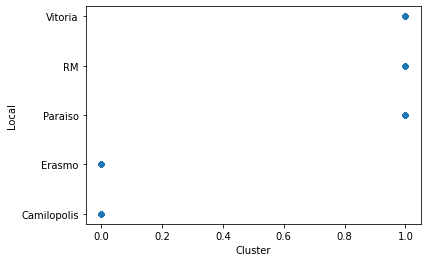

In [111]:
df_cluster.groupby(['Cluster', 'Local', 'Ano', 'Mes', 'Dia']).sum().reset_index().plot.scatter('Cluster', 'Local')

In [96]:
#df_cluster.sample(n=100000).plot.scatter('Mes', 'Precipitacao')